In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [2]:
df=pd.read_csv(r'titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.set_index('PassengerId', inplace=True)

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#there are 6 numeric columns and 4 object columns 

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
#pr=ProfileReport(df)
#pr

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      

#we see there are some missing / NAN values in colums "Age", "Cabin","Embarked"

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

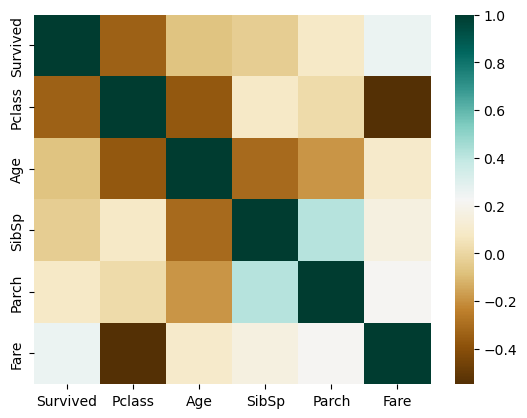

In [12]:
sns.heatmap(df.corr(),cmap='BrBG')

# we also see that higher the PClass higher the chances of survival

<Axes: xlabel='Survived', ylabel='count'>

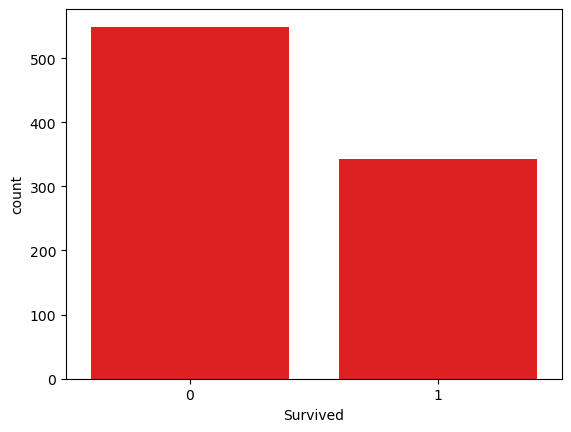

In [13]:
sns.countplot(x='Survived',data=df,color="Red")

<Axes: xlabel='Survived', ylabel='count'>

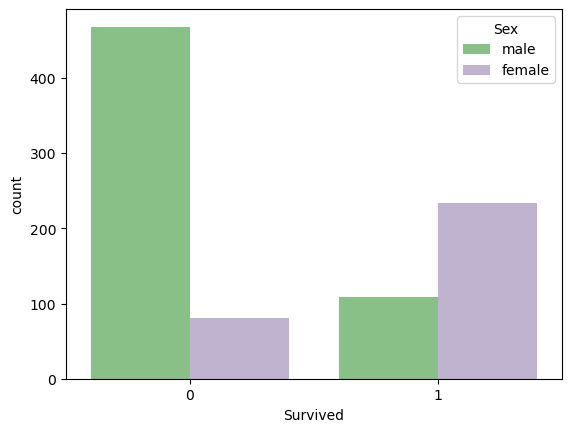

In [14]:
sns.countplot(x='Survived',data=df, hue='Sex',palette="Accent")

#The above 2 graphs display that very few people survived in the accident. In those few that survived majority of females survived compared to the males. most passengers who lost lives were males 

<Axes: xlabel='Survived', ylabel='count'>

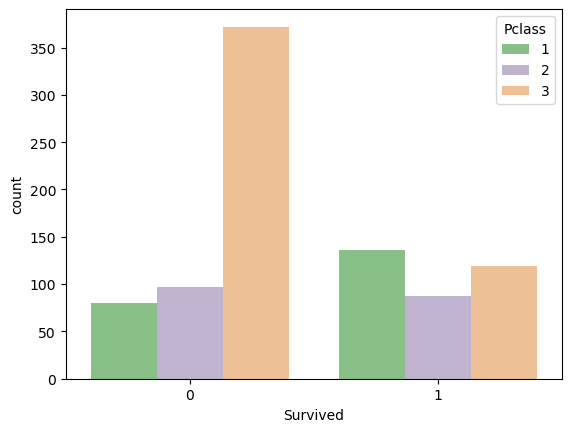

In [15]:
sns.countplot(x='Survived',data=df, hue='Pclass',palette="Accent")

#most passengers with Pclass 3 loss tickets lost their lives. 
#most passengers with Pclass 1 were saved. 

<Axes: xlabel='SibSp', ylabel='count'>

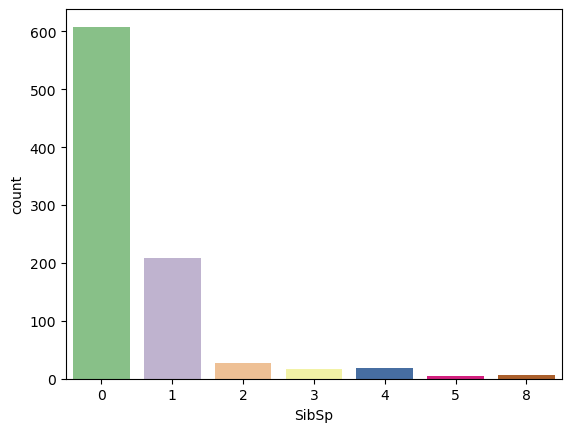

In [16]:
sns.countplot(x='SibSp',data=df,palette="Accent")

above plot show the details of siblings and spouse,,, max people did not have siblings and spouse

In [17]:
le=LabelEncoder()

In [18]:
df['Sex']=le.fit_transform(df['Sex'])

In [19]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [20]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

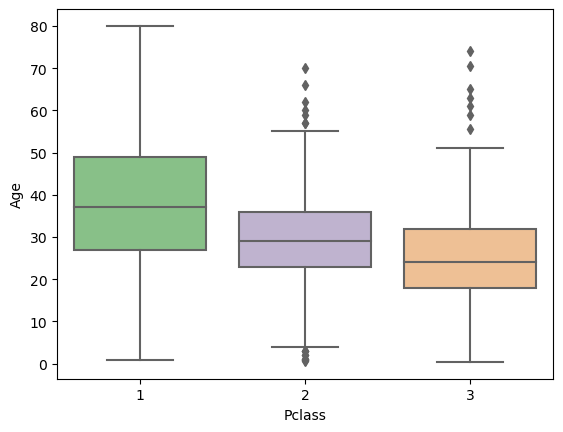

In [21]:
sns.boxplot(x='Pclass',y='Age', data =df,palette="Accent" )

we see that passengers in class 1 has average age around 37 class 2 has around 29 and class 3 aroud 25

In [22]:
def age(cols):
    Age= cols[0]
    Pclass=[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age    

In [23]:
df['Age']= df[['Age','Pclass']].apply(age,axis=1)

In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Too many null in Cabin and 2 in Embarked hence dropping

In [25]:
df.drop('Cabin',axis=1, inplace=True)

In [26]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,S


In [27]:
df.dropna(inplace=True)

In [28]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    int32  
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 69.5+ KB


In [30]:
df.drop(['Name',"Ticket"], axis=1, inplace=True)

In [31]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,25.0,1,2,23.4500,2


# Time to train the model

In [32]:
x=df.drop('Survived',axis=1)

In [33]:
y=df["Survived"]

In [34]:
print(x.shape)
print(y.shape)

(889, 7)
(889,)


In [35]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30, random_state=42)

In [36]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(267, 7)
(622, 7)
(267,)
(622,)


In [37]:
model_regression = { 
    "Logistic Regression" : LogisticRegression(),
        "Decision Tree" : DecisionTreeClassifier(),
        "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting" :GradientBoostingClassifier(),
    "XGBoost"           :xgb.XGBRFClassifier()
}

In [38]:
for i,model in model_regression.items():
    model.fit(x_train,y_train)
    print(f'{i} trained')

Logistic Regression trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained
XGBoost trained


In [39]:
lr=LogisticRegression()
logr=lr.fit(x_train,y_train)

In [40]:
pred=model.predict(x_test)

In [41]:
for i, model in model_regression.items():
    pred = model.predict(x_test)
    print(f'{i} predicted')

Logistic Regression predicted
Decision Tree predicted
Random Forest predicted
Gradient Boosting predicted
XGBoost predicted


In [42]:
for i, model in model_regression.items():
    pred = model.predict(x_test)
    acc=accuracy_score(pred,y_test)
    print(f'{i} Accuracy Score: {format(acc,"0.3f")}')

Logistic Regression Accuracy Score: 0.794
Decision Tree Accuracy Score: 0.757
Random Forest Accuracy Score: 0.772
Gradient Boosting Accuracy Score: 0.809
XGBoost Accuracy Score: 0.809


# Gradient Boost & XGBost are giving good accuracy 